## Imports and definitions

In [29]:
from fastai.conv_learner import *

In [30]:
sz = 224
bs = 64
path = "./data/"
arch = resnet50
labels_csv = f'{path}labels.csv'

In [31]:
def get_data(sz=224, bs=64, val_pct=0.15):
    tfms = tfms_from_model(arch, sz)
    n = len(list(open(labels_csv)))-1
    val_idxs = get_cv_idxs(n, val_pct=val_pct)
    return ImageClassifierData.from_csv(path, 'train', labels_csv, val_idxs=val_idxs, tfms=tfms, suffix='.jpg', test_name='test')

## Precomputed model training

In [32]:
data = get_data(sz=256)

In [33]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=[0.5, 0.5], xtra_fc=[1024])

In [34]:
learn

Sequential(
  (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.5)
  (2): Linear(in_features=4096, out_features=1024)
  (3): ReLU()
  (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.75)
  (6): Linear(in_features=1024, out_features=120)
  (7): LogSoftmax()
)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 114/136 [00:02<00:00, 41.82it/s, loss=15.8]


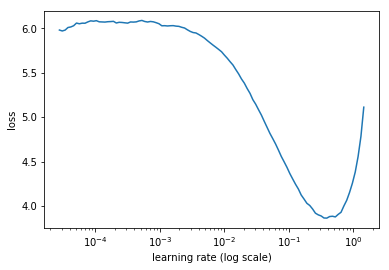

In [35]:
learn.lr_find()
learn.sched.plot()

In [36]:
learn.fit(0.1, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.894039   0.643781   0.819437  
    1      0.914126   0.519972   0.85723                     
    2      0.611178   0.430915   0.869664                    
    3      0.717874   0.53088    0.848766                    
    4      0.592115   0.446718   0.865789                    
    5      0.4749     0.433626   0.872268                    



[0.4336257, 0.8722677603363991]

## Learn with data augmentation

In [38]:
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▉ | 121/136 [00:43<00:05,  2.78it/s, loss=1.79] 

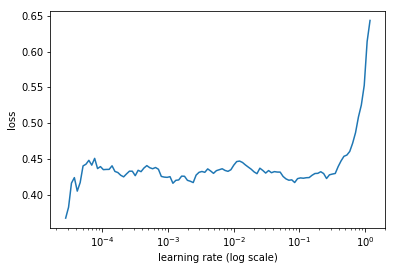

In [41]:
learn.lr_find()
learn.sched.plot()

In [40]:
learn.fit(0.001, 2, cycle_len=5)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

 10%|█         | 14/136 [00:05<00:49,  2.45it/s, loss=0.431]

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.444975   0.410686   0.872919  
    1      0.428512   0.410215   0.871617                    
    2      0.42344    0.408798   0.872268                    
    3      0.438473   0.406777   0.874221                    
    4      0.432035   0.406101   0.871617                    
    5      0.417463   0.406325   0.872268                    
    6      0.413116   0.405124   0.87357                     
    7      0.421021   0.405176   0.874872                    
    8      0.415257   0.406196   0.872919                    
    9      0.418002   0.40401    0.872919                    



[0.40400973, 0.8729188020030657]

## Learn unfreezing the data

In [47]:
learn.unfreeze()
learn.bn_freeze(True)

In [48]:
learn.fit([1e-5, 1e-4, 1e-3], 1, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.096803   0.436864   0.874936  
    1      0.100095   0.44012    0.87754                      
    2      0.083153   0.441226   0.878842                     



[0.44122636, 0.8788422122597694]

## Learn with different data size

In [46]:
data350 = get_data(sz=350)

In [49]:
learn.set_data(data350)

In [50]:
learn.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 119/136 [01:20<00:11,  1.48it/s, loss=1.14] 

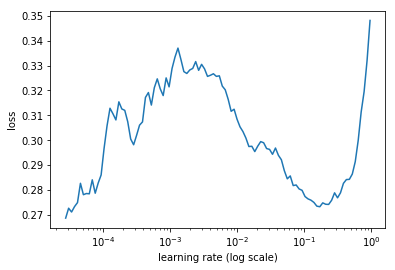

In [51]:
learn.lr_find()
learn.sched.plot()

In [52]:
learn.fit(0.01, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  2%|▏         | 3/136 [00:03<02:16,  1.03s/it, loss=0.327]

Exception in thread Thread-82:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.292708   0.410745   0.880795  
    1      0.267919   0.410216   0.881446                    
    2      0.274329   0.410639   0.881446                    
    3      0.256207   0.411121   0.878191                    
    4      0.251244   0.410362   0.882097                    
    5      0.248688   0.4103     0.881446                    



[0.4103005, 0.8814463789264361]